In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sympy as sp

$\textbf{Parte 2}$ 

In [89]:
def function(x,y):
    f = np.exp(-((x-1)**2+(y-1)**2)/(0.3**2))-0.5*(np.exp(-16*((x-2)**2+(y-2)**2)))
    return f

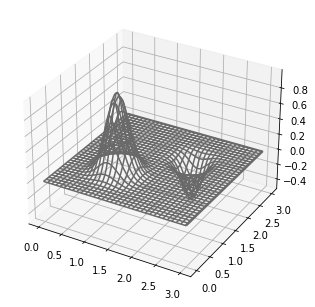

In [90]:
X = np.linspace(-0,3,500)
Y = np.linspace(-0,3,500)
X, Y = np.meshgrid(X, Y)
Z = function(X,Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z, rstride=15, cstride=15, color = 'dimgrey')
plt.show()

In [91]:
def grad_function(x,y):
    dx = -22.2222*(np.exp((-x**2 + 2*x + y**2 + 2 - 2*y)/0.09))*(x-1) + 16*(np.exp(-16*(x**2 - 4*x + y**2 + 8 - 4*y)))*(x-2)
    dy = -22.2222*(np.exp((-y**2 + 2*y + x**2 + 2 - 2*x)/0.09))*(y-1) + 16*(np.exp(-16*(y**2 - 4*y + x**2 + 8 - 4*x)))*(y-2)
    return dx, dy

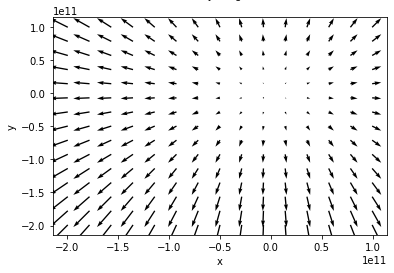

In [92]:
X_g = np.linspace(-0,3,15)
Y_g = np.linspace(-0,3,15)

X_grad, Y_grad = grad_function(X_g,Y_g)
U, V = np.meshgrid(X_grad, Y_grad)
fig, ax = plt.subplots()
q = ax.quiver(X_grad, Y_grad, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [93]:
from numpy import linalg as LA
def norma(x, y):
    dx = -22.2222*(np.exp((-x**2 + 2*x + y**2 + 2 - 2*y)/0.09))*(x-1) + 16*(np.exp(-16*(x**2 - 4*x + y**2 + 8 - 4*y)))*(x-2)
    dy = -22.2222*(np.exp((-y**2 + 2*y + x**2 + 2 - 2*x)/0.09))*(y-1) + 16*(np.exp(-16*(y**2 - 4*y + x**2 + 8 - 4*x)))*(y-2)    
    normax = dx/LA.norm(dx+dy)
    normay = dy/LA.norm(dx+dy)
    return normax,normay

In [94]:
def next_point(x, y, alpha):
    step = 1*alpha
    normax, normay = norma(x,y)
    rx = x- step*normax
    ry = y- step*normay
    return rx, ry

In [135]:
def simulated_annealing(n,T_i,beta,xi,yi):
    xs = [xi]
    ys = [yi]
    alpha = np.random.uniform(0,1)
    for i in range(2,n):
        xtest, ytest = next_point(xi,yi,alpha)
        xtest = xtest*(1+beta*np.random.uniform())
        ytest = ytest*(1+beta*np.random.uniform())
        mais = function(xtest,ytest)
        menos = function(xs[i-2],ys[i-2])
        delta = mais - menos
        if delta < 0:
            xi = xtest
            yi = ytest
        else:
            T = T_i*alpha
            P = np.exp(delta/T)
            h = np.random.uniform()
            if P > h:
                xi = xtest
                yi = ytest
        xs.append(xi)
        ys.append(yi)
    return xs, ys

In [142]:
xs, ys = simulated_annealing(100,1.5,np.random.uniform(),1,1)
zs = []
for i in range(len(xs)):
    zs.append(function(xs[i],ys[i]))

/home/ricardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/ricardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


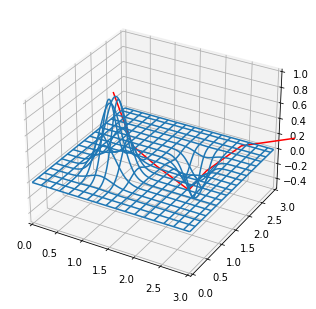

In [143]:
X = np.linspace(-0,3,500)
Y = np.linspace(-0,3,500)
X, Y = np.meshgrid(X, Y)
Z = function(X,Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(xs, ys, zs, color = "red")
ax.plot_wireframe(X, Y, Z, rstride=30, cstride=30)
plt.xlim(-0,3)
plt.ylim(-0,3)
plt.show()

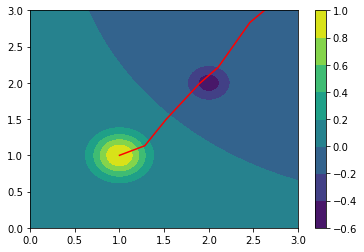

In [145]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cs)
ax.plot(xs,ys,color = 'red')
plt.xlim(0,3)
plt.ylim(0,3)
plt.show()

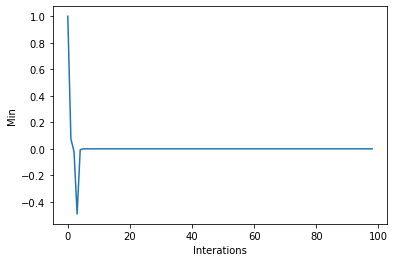

In [121]:
t = [i for i in range(len(xs))]
#yerr = np.linspace(0.05, 0.2, len(xs))
#plt.errorbar(t, zs, yerr=yerr, label='both limits (default)')
plt.plot(t,zs)
plt.xlabel('Interations')
plt.ylabel('Min')
plt.show()